**Materiály vznikají průběžně a jsou bez záruky - prosím o report chyb :-)**

**Update**

- kritické hodnoty můžeme najít přímo metodou `isf(alpha, params)`, např. `t.isf(0.05, df=10)`

In [2]:
import numpy as np
np.set_printoptions(precision=3)
from scipy.stats import norm, t, chi2
import matplotlib.pylab as plt

# [Teorie odhadu](https://en.wikipedia.org/wiki/Estimation_theory) - [intervalové odhady](https://en.wikipedia.org/wiki/Confidence_interval)


## Příklad

Nástupní platy 16 brazilských IT odborníků v nestátní sféře měly v průměru $\bar{X}_n = 10.3$ tisíce BRL (brazilský real). 

Předpokládejme, že platy jsou normálně rozdělené se směrodatnou odchylkou 1.2 tisíce, tj.

$$
X \sim \mathcal{N}(\mu, 1.2^2).
$$

Střední hodnotu $\mu$ neznáme a máme ji nějak odhadnout.

Nápověda: Můžeme vyjít z podmínky, že bude existovat kvantil $q$ takový, že

$$
P(\bar{X}_n > q) = \alpha,
$$

kde $\alpha = 0.1$.

---

**To už dávno umíme :-)**  - prostě uděláme standardizaci do $\mathcal{N}(0,1)$ a najdeme odpovídající kvantil $1-\alpha$. A protože **kvantil $u_{1-\alpha}$ je totéž, co kritická hodnota $z_\alpha$**, pro niž máme rovněž tabulky, tak budeme pracovat s ní.

![img](img/krit_hod.jpg)

$$
\begin{align}
\alpha = P(\bar{X}_n > q) &=
P\left( \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} > z_\alpha \right) \\
&= P\left(\bar{X}_n - \mu > \frac{z_\alpha \cdot \sigma}{\sqrt{n}} \right) \\
&= P \left( \bar{X}_n - \frac{z_\alpha \cdot \sigma}{\sqrt{n}} > \mu \right) = \alpha = 0.1
\end{align}
$$

Z prvního a posledního řádku máme tedy tuto interpretaci:

**Pravděpodobnost, že průměr $\bar{X}_n$ překročí $\alpha$-kritickou hodnotu - tj. $(1-\alpha)$-kvantil $q$ je stejná, jako pravděpodobnost, že střední hodnota $\mu$ bude menší než $\bar{X}_n - \frac{z_\alpha \cdot \sigma}{\sqrt{n}}$. A v obou případech bude $\alpha$.**

To znamená, že interval

$$
\left(\bar{X}_n - \frac{z_\alpha \cdot \sigma}{\sqrt{n}}, \infty\right)
$$

pokrývá skutečnou (leč neznámou) hodnotu $\mu$ s pravděpodobností $1-\alpha$. Takový interval nazýváme **pravostranným $(1-\alpha)$% intervalem spolehlivosti**.

Zcela analogickým postupem bychom došli k **levostrannému intervalu spolehlivosti** ve tvaru

$$
\left(-\infty, \bar{X}_n + \frac{z_\alpha \cdot \sigma}{\sqrt{n}}\right).
$$

**Oboustranný interval spolehlivosti** rozdělí hodnotu $\alpha$ na levou a pravou stranu stejnoměrně. A protože standardní "gaussovka" je symetrická kolem nuly, jsou i obě kritické hodnoty rozdílné jen znaménkem, $\pm z_{\alpha/2}$.

![img](img/z_alpha.jpg)

Oboustranný interval spolehlivosti tedy bude (dokaže si to!)

$$
\left(\bar{X}_n - \frac{z_{\alpha/2} \cdot \sigma}{\sqrt{n}}, \bar{X}_n + \frac{z_{\alpha/2} \cdot \sigma}{\sqrt{n}}\right).
$$

Spočtěme si tedy 90% intervaly spolehlivosti pro střední hodnotu platu brazilských ajťáků :-)

In [3]:
Xn = 10.3
n = 16
sigma = 1.2
alpha = 0.1

kriticka_hodnota_jedno = norm.isf(alpha)
kriticka_hodnota_obou = norm.isf(alpha/2)
print('{0}% kritická hodnota rozdělení N(0,1):\nz({1})={2:.4f}'
      .format(100*alpha, alpha, kriticka_hodnota_jedno))
print('\n{0}% kritická hodnota rozdělení N(0,1):\nz({1})={2:.4f}'
      .format(100*alpha/2, alpha/2, kriticka_hodnota_obou))
delta = kriticka_hodnota_jedno * sigma / np.sqrt(n)
delta_obou = kriticka_hodnota_obou * sigma / np.sqrt(n)
ISpravy = np.array([Xn - delta, np.inf])
ISlevy = np.array([-np.inf, Xn + delta])
IS = np.array([Xn - delta_obou, Xn + delta_obou])
print('\nPravostranný IS: ', ISpravy)
print('Levostranný IS: ', ISlevy)
print('Oboustranný IS: ', IS)

10.0% kritická hodnota rozdělení N(0,1):
z(0.1)=1.2816

5.0% kritická hodnota rozdělení N(0,1):
z(0.05)=1.6449

Pravostranný IS:  [9.916   inf]
Levostranný IS:  [  -inf 10.684]
Oboustranný IS:  [ 9.807 10.793]


### Pojďme testovat hypotézu o střední hodnotě...

**Máme na hladině 0.1 otestovat hypotézu, že střední hodnota $\mu$ nástupního platu brazilských ajťáků je rovna 11 tisícům proti alternativě, že není.**

$$
\begin{align}
&H_0: \mu = \mu_0 = 11 \\
&H_A: \mu \ne \mu_0 = 11.
\end{align}
$$

Naším cílem je, aby:
$$
\begin{alignat}{2}
&P(\text{Zamítnu}\ H_0 | \text{platí}\ H_0) \leq \alpha,
\qquad\qquad\quad &&\text{(chyba 1. druhu)} \\
&P(\text{Nezamítnu}\ H_0 | \text{neplatí}\ H_0)\ \text{byla minimální.}\qquad&&\text{(chyba 2. druhu)}\\
\end{alignat}
$$

Zde $\alpha$ nazveme **hladinou testu**, splývá nám zde s **hladinou významnosti**. Podle toho, zda $\mu_0$ leží či neleží v příslušném intervalu spolehlivosti buď $H_0$ **nezamítneme** nebo **zamítneme**. Hypotézy se **nikdy nepřijímají**!

**V příkladu $\mu_0 \notin [9.807, 10.793] \Longrightarrow$ zamítáme $H_0$.** Brazilští ajťáci prostě nenastupují za platy, jež by měly střední hodnotu 11 tisíc realů.

## Intervalový odhad potřebuje rozptyl. Co když jej nemáme?

**Nahradíme-li rozptyl $\sigma^2$ jeho bodovým odhadem - výběrovým rozptylem**

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X}_n)^2,
$$

**dostaneme veličinu se [Studentovým $t$ rozdělením](https://en.wikipedia.org/wiki/Student%27s_t-distribution) s $n-1$ stupni volnosti**,

$$
\frac{\bar{X}_n - \mu}{s/\sqrt{n}} \sim t_{n-1}.
$$

Toto rozdělení pochází do [W.S. Gosseta aka Studenta](https://en.wikipedia.org/wiki/William_Sealy_Gosset), v té době zaměstnance firmy Guiness. Používá se pro popis veličin s (přibližně) normálním rozdělením a to zejména v případech, kdy je k dispozici pouze malý rozsah výběru a tedy odhad rozptylu má "větší nejistotu". Proto má Studentovo rozdělení při malém počtu stupňů volnosti ("málo datech") plošší hustotu. V limitě potom přejde do normálního rozdělení. Proto v důsledku limitních vět lze použít i pro jiná rozdělení, zvl. pokud je rozumný rozsah výběru.

Speciální případ [Studentova rozdělení](https://en.wikipedia.org/wiki/Student%27s_t-distribution) je $n=1$, tzv. [Cauchyho rozdělení](https://en.wikipedia.org/wiki/Cauchy_distribution). To je příkladem degenerovaného rozdělení, neboť jeho střední hodnota ani rozptyl pro příliš [těžké chvosty](https://en.wikipedia.org/wiki/Heavy-tailed_distribution) neexistují.

Hustoty rozdělení pro pár stupňů volnosti a porovnání s hustotou $\mathcal{N}(0,1)$ znázorňuje následující obrázek. Současně dává tušit, že intervaly spolehlivosti při stejné hladině budou širší, než při známém rozptylu. Proč? ;-)

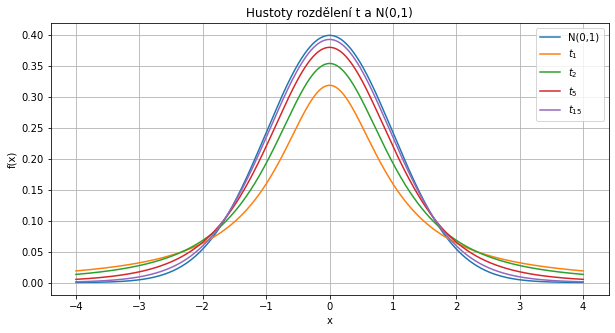

In [4]:
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10,5))
plt.plot(x, norm.pdf(x), label='N(0,1)')
for df in [1, 2, 5, 15]:
    plt.plot(x, t.pdf(x, df=df), label=r'$t_{' + str(df) + '}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Hustoty rozdělení t a N(0,1)')
plt.show()

### Zpátky k příkladu

Předpokládejme nyní, že v příkladu výše neznáme rozptyl, ale výběrový rozptyl nám vyšel $1.2^2$ (tedy stejně jako rozptyl výše, pro porovnání). Budeme počítat intervaly spolehlivosti pomocí Studentova t rozdělení. Jaké jsou v porovnání s předchozími?

In [5]:
Xn = 10.3
n = 16
s= 1.2
alpha = 0.1

kriticka_hodnota_jedno = t.isf(alpha, df=n-1)
kriticka_hodnota_obou = t.isf(alpha/2, df=n-1)

print('{0}% kritická hodnota rozdělení t:\nt({1})={2:.4f}'
      .format(100*alpha, alpha, kriticka_hodnota_jedno))
print('\n{0}% kritická hodnota rozdělení t:\nt({1})={2:.4f}'
      .format(100*alpha/2, alpha/2, kriticka_hodnota_obou))

delta = kriticka_hodnota_jedno * s / np.sqrt(n)
delta_obou = kriticka_hodnota_obou * s / np.sqrt(n)

ISpravy = np.array([Xn - delta, np.inf])
ISlevy = np.array([-np.inf, Xn + delta])
IS = np.array([Xn - delta_obou, Xn + delta_obou])

print('\nLevostranný IS: ', ISlevy)
print('Pravostranný IS: ', ISpravy)
print('Oboustranný IS: ', IS)

10.0% kritická hodnota rozdělení t:
t(0.1)=1.3406

5.0% kritická hodnota rozdělení t:
t(0.05)=1.7531

Levostranný IS:  [  -inf 10.702]
Pravostranný IS:  [9.898   inf]
Oboustranný IS:  [ 9.774 10.826]


### [Test hypotézy](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing#Definition_of_terms)

Máme navíc na stejné hladině $\alpha$ otestovat

$$
\begin{align}
&H_0: \mu = 10 \\
&H_A: \mu < 10.
\end{align}
$$

Jelikož $10 \in [-\infty, 10.702]$, nulovou hypotézu nezamítáme.

Teď už by mělo být zřejmé, že testy jsou rovněž jednostranné nebo oboustranné a používáme k nim související intervaly spolehlivosti :)

## Intervaly spolehlivosti pro rozptyl normálního rozdělení

Vyjdeme z toho, že pro výběr $X_1, \ldots, X_n$, $n\geq 2$ z normálního rozdělení $\mathcal{N}(\mu, \sigma^2)$, kde $\sigma^2>0$ a výběrový (nevychýlený) rozptyl $s^2$ má náhodná veličina

$$
\frac{(n-1)s^2}{\sigma^2} \sim \chi_{n-1}^2,
$$

tj. má [chí-kvadrát rozdělení](https://en.wikipedia.org/wiki/Chi-squared_distribution) s $n-1$ stupni volnosti. Graf hustoty pro různé stupně volnosti vypadá následovně:

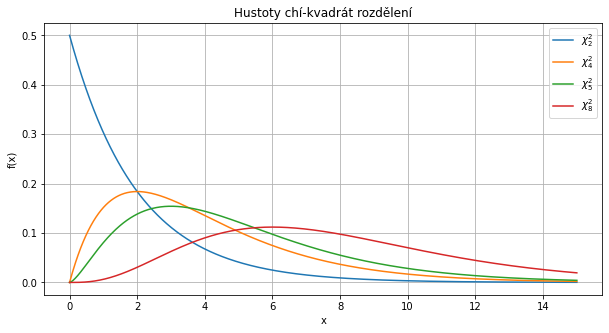

In [6]:
x = np.linspace(1e-10, 15, 1000)
plt.figure(figsize=(10,5))
for df in [2, 4, 5, 8]:
    plt.plot(x, chi2.pdf(x, df=df), label=r'$\chi_{' + str(df) + '}^2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Hustoty chí-kvadrát rozdělení')
plt.show()

Řekněme, že máme udělat takový interval pro $\sigma^2$, aby pro zjištěný výběrový rozptyl $s^2$ a zadanou kritickou hodnotu $\alpha$ platilo

$$
\begin{align}
\alpha = P(s^2 > q) &= P\left( \frac{(n-1)s^2}{\sigma^2} > \chi_{n-1}^2(\alpha) \right) \\
&= P\left( \frac{(n-1)s^2}{\chi_{n-1}^2(\alpha)} > \sigma^2 \right).
\end{align}
$$

Stejně jako výše jsme tedy současně našli **$(1-\alpha)$% pravostranný interval spolehlivosti pro rozptyl** ve tvaru

$$
\left(\frac{(n-1)s^2}{\chi_{n-1}^2(\alpha)}, \infty\right).
$$

Interval levostranný nelze hledat symetrií, neboť chí-kvadrát rozdělení není symetrické ani centrované v nule. Budeme tedy hledat pro kritickou hodnotu $1-\alpha$ a získáme **$(1-\alpha)$% levostranný interval spolehlivosti pro rozptyl**

$$
\left( 0, \frac{(n-1)s^2}{\chi_{n-1}^2(1-\alpha)} \right).
$$

Oboustranný interval se hledá z "úmluvy", že se navzdory asymetrii $\alpha$ rozdělí symetricky a budeme hledat s kritickými hodnotami $\chi_{n-1}^2(1-\alpha/2)$ a $\chi_{n-1}^2(\alpha/2)$. Výsledný **oboustranný interval spolehlivosti** pro rozptyl je

$$
\left(
\frac{(n-1)s^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2}\right)},
\frac{(n-1)s^2}{\chi_{n-1}^2 \left(1-\frac{\alpha}{2} \right)} \right)
$$

Pozor na meze jednostranných IS (nuly). Tyto IS platí jen pro rozptyl normálního rozdělení!

### A naposled k příkladu výše

Máme sestavit interval spolehlivosti pro rozptyl $\sigma^2$, pokud výběrová směrodatná odchylka vyšla $s=1.2$.

In [7]:
s2 = 1.2**2
alpha = 0.1
print('Výběrový rozptyl s2 = ', s2)

kriticka_hodnota_levy = chi2.isf(1-alpha, df=n-1)
kriticka_hodnota_pravy = chi2.isf(alpha, df=n-1)
kriticka_hodnota_oboustr = chi2.isf([alpha/2, 1-alpha/2], df=n-1)

IS_pravy = np.array([(n-1) * s2 / kriticka_hodnota_pravy, np.inf])
IS_levy = np.array([0, (n-1) * s2 / kriticka_hodnota_levy])
IS = (n - 1) * s2 / kriticka_hodnota_oboustr

print('Pravostranný IS: ', IS_pravy)
print('Levostranný IS: ', IS_levy)
print('Oboustranný IS: ', IS)

Výběrový rozptyl s2 =  1.44
Pravostranný IS:  [0.968   inf]
Levostranný IS:  [0.    2.527]
Oboustranný IS:  [0.864 2.975]


## Shrnutí intervalů spolehlivosti a testů

Následující tabulka shrnuje tři uvedené typy intervalů spolehlivosti. Na konci máme ještě podobu alternativní hypotézy. Pokud testujeme střední hodnotu, pak za $\theta$ dosazujeme $\mu$, a $\theta_0$ je testovaná hodnota. Obecně ve statistice je $\theta$ univerzální písmenko, kterým značíme parametry, většinou neznámé a odhadované.

Pokud máme např. na hladině $\alpha=0.01$ testovat, že střední hodnota je 10 proti alternativě, že je menší a rozptyl neznáme, tj.

$$
\begin{align}
&H_0: \mu = 10 \\
&H_A: \mu < 10
\end{align}
$$

použijeme příslušný 99% levostranný interval spolehlivosti a ověříme, zda do něj hodnota $\mu_0 = 10$ patří či nikoliv. Podle toho $H_0$ nezamítneme či zamítneme. Pozor, pokud zamítneme, tak to děláme ve prospěch alternativní hypotézy. Pokud ovšem nezamítneme, nevíme nic :) **Hypotézy nikdy nepřijímáme!** Pokud test vychází tak, že zamítáme $H_0$, mluvíme o statisticky významném testu.

| Odhadovaný parametr| Levostranný interval spolehlivosti | Pravostranný interval spolehlivosti | Oboustranný interval spolehlivosti&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
|---|:---:|:---:|:---:|
| $\mu=?$, známé $\sigma^2$| ${\left(-\infty, \bar{X}_n + \frac{z_\alpha \cdot \sigma}{\sqrt{n}}\right)}$| ${\left(\bar{X}_n - \frac{z_\alpha \cdot \sigma}{\sqrt{n}}, \infty\right)}$ | ${\left(\bar{X}_n - \frac{z_{\alpha/2} \cdot \sigma}{\sqrt{n}}, \bar{X}_n + \frac{z_{\alpha/2} \cdot \sigma}{\sqrt{n}}\right)}$ |
| $\mu=?$, neznámé $\sigma^2$| $\left(-\infty, \bar{X}_n + \frac{t_{n-1}(\alpha) \cdot s}{\sqrt{n}}\right)$ | $\left(\bar{X}_n - \frac{t_{n-1}(\alpha) \cdot s}{\sqrt{n}}, \infty\right)$ |$\left(\bar{X}_n - \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}}, \bar{X}_n + \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}}\right)$ |
| $\sigma^2=?$ | $\left( 0, \frac{(n-1)s^2}{\chi_{n-1}^2(1-\alpha)} \right)$ | $\left(\frac{(n-1)s^2}{\chi_{n-1}^2(\alpha)}, \infty\right)$ | $\left(\frac{(n-1)s^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2}\right)},\frac{(n-1)s^2}{\chi_{n-1}^2 \left(1-\frac{\alpha}{2} \right)} \right)$ |
|$H_A$| $\theta < \theta_0$| $\theta > \theta_0$| $\theta \ne \theta_0$ |

Uvedené testy nazýváme celkem přímočaře [Z-test hypotézy o střední hodnotě](https://en.wikipedia.org/wiki/Z-test), [t-test hypotézy o střední hodnotě](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test) a [chí-kvadrát test hypotézy o rozptylu normální veličiny](https://en.wikipedia.org/wiki/Chi-squared_test#Chi-squared_test_for_variance_in_a_normal_population).

Celá problematika intervalových odhadů a testování hypotéz je daleko bohatší, než lze v PST probrat. Ale stojí za to si o tom před zkouškou něco přečíst - viz odkazy v celém notebooku.

## Co jsou a nejsou intervaly spolehlivosti

[**Pozor, v tomto chybují i experti! Ale student PST nesmí!**](https://en.wikipedia.org/wiki/Confidence_interval#Meaning_and_interpretation)

Víme, že průměr náhodných veličin je náhodná veličina. Proto i interval spolehlivosti zkonstruovaný z výběru bude v nějakém smyslu náhodný, pro různá pozorování bude různý.

$(1-\alpha)$% interval spolehlivosti je takový interval, který s pravděpodobností $1-\alpha$ **pokryje** odhadovaný neznámý parametr. Jinými slovy, ze 100 zkonstruovaných intervalů jich v průměru $\alpha$ parametr nepokryje - viz následující simulace.

**Není pravdivé tvrzení**, že $(1-\alpha)$% interval spolehlivosti obsahuje neznámý parametr s pravděpodobností $1-\alpha$. To dělají bayesovské intervaly spolehlivosti!

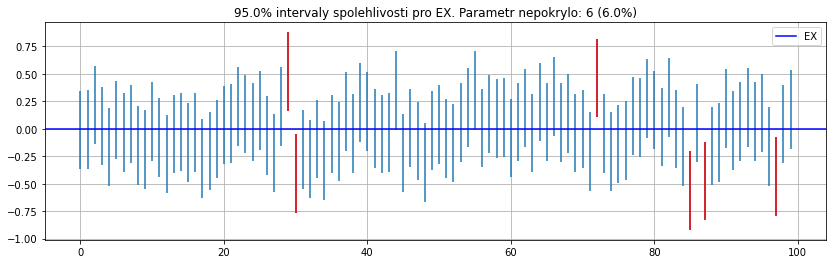

In [13]:
EX = 0
sigma2 = 1
n = 30
alpha=0.05
repeats = 100

Xis = norm.rvs(loc=EX, scale=np.sqrt(sigma2), size=(repeats, n))
Xbars = Xis.mean(axis=1)
z_krit = norm.isf(alpha/2)
deltas = z_krit * np.sqrt(sigma2) / np.sqrt(n)
ISs = np.c_[Xbars - deltas, Xbars + deltas]
ISs_out_ind = np.r_[np.argwhere(ISs[:,0]>EX).flatten(), 
                    np.argwhere(ISs[:,1]<EX).flatten()]

plt.figure(figsize=(14,4))
plt.vlines(range(repeats), ymin=ISs[:,0], ymax=ISs[:,1])
plt.vlines(ISs_out_ind, ymin=ISs[ISs_out_ind,0], ymax=ISs[ISs_out_ind, 1], color='red')
plt.axhline(EX, color='blue', label='EX')
plt.legend()
plt.title('{0}% intervaly spolehlivosti pro EX. Parametr nepokrylo: {1} ({2:.1f}%)'
          .format((1-alpha)*100, ISs_out_ind.size, 100*ISs_out_ind.size/repeats))
plt.show()

## Příklad 10.1

**Uvažujme náhodný výběr $n = 16$ hodnot z normálního rozdělení. Výběrový průměr a směrodatnou odchylku jsme spočetli jako $\bar X_n = 10.3$ a $s_n = 1.2$.**

**a) Najděte oboustranný a levý (dolní) jednostranný 90% interval spolehlivosti pro střední hodnotu $\mu$.**

In [8]:
Xbar = 10.3
sn = 1.2
n = 16
alpha = 0.1

kriticka_hodnota_jedno = t.isf(alpha, df=n-1)
kriticka_hodnota_obou = t.isf(alpha/2, df=n-1)
print('{0}% kritická hodnota rozdělení t:\nt({1})={2:.4f}'
      .format(100*alpha, alpha, kriticka_hodnota_jedno))
print('\n{0}% kritická hodnota rozdělení t:\nt({1})={2:.4f}'
      .format(100*alpha/2, alpha/2, kriticka_hodnota_obou))
delta = kriticka_hodnota_jedno * s / np.sqrt(n)
delta_obou = kriticka_hodnota_obou * s / np.sqrt(n)
ISlevy = np.array([-np.inf, Xn + delta])
IS = np.array([Xn - delta_obou, Xn + delta_obou])
print('\nLevostranný IS: ', ISlevy)
print('Oboustranný IS: ', IS)

10.0% kritická hodnota rozdělení t:
t(0.1)=1.3406

5.0% kritická hodnota rozdělení t:
t(0.05)=1.7531

Levostranný IS:  [  -inf 10.702]
Oboustranný IS:  [ 9.774 10.826]


**b) Najděte oboustranný a levý (dolní) interval 90% spolehlivosti pro rozptyl $\sigma^2$.**

In [9]:
sn = 1.2
s2 = sn**2
n = 16
alpha = 0.1

kriticka_hodnota_levy = chi2.isf(1-alpha, df=n-1)
kriticka_hodnota_oboustr = chi2.isf([alpha/2, 1-alpha/2], df=n-1)

IS_levy = np.array([0, (n-1) * s2 / kriticka_hodnota_levy])
IS = (n - 1) * s2 / kriticka_hodnota_oboustr

print('Levostranný IS: ', IS_levy)
print('Oboustranný IS: ', IS)

Levostranný IS:  [0.    2.527]
Oboustranný IS:  [0.864 2.975]


## Příklad 10.2

**Potřebujeme odhadnout průměrnou délku transakce databázového serveru (v jednotkách ms). Předpokládejme, že délky transakcí jsou nezávislé a stejně rozdělené $X_1, X_2, \dotsc$ s konečnými $\mu = \mathrm E X_i$ a $\sigma^2 = \operatorname{var} X_i$.**

**Z $50$ náhodně vybraných transakcí jsme spočetli:**

$$
            \sum_{i=1}^{50} X_i = 684.199\quad\text{a}\quad \sum_{i=1}^{50} X_i^2 = 18651.3.
$$

**a) Najděte bodový odhad střední hodnoty $\mu$ a rozptylu $\sigma^2$.**

In [10]:
sum_x = 684.199
sum_x2 = 18651.3
n = 50

mean_x = sum_x / n
mean_x2 = sum_x2 / n
varX = mean_x2 - mean_x**2
varXc = varX * n/(n-1)

print('Průměr - odhad střední hodnoty: {0:.2f}'.format(mean_x))
print('Výběrová variance s2 = {0:.4f}'.format(varXc))
print('(Bez Besselovy korekce: s2 = {0:.4f})'.format(varX))

Průměr - odhad střední hodnoty: 13.68
Výběrová variance s2 = 189.5660
(Bez Besselovy korekce: s2 = 185.7747)


**b) Najděte jedno a oboustranné $99\%$ intervalové odhady $\mu$.**

In [11]:
s = np.sqrt(varXc)
alpha = 0.01

kriticka_hodnota_jedno = t.isf(alpha, df=n-1)
kriticka_hodnota_obou = t.isf(alpha/2, df=n-1)

delta = kriticka_hodnota_jedno * s / np.sqrt(n)
delta_obou = kriticka_hodnota_obou * s / np.sqrt(n)

ISpravy = np.array([mean_x - delta, np.inf])
ISlevy = np.array([-np.inf, mean_x + delta])
IS = np.array([mean_x - delta_obou, mean_x + delta_obou])

print('\nLevostranný IS: ', ISlevy)
print('Pravostranný IS: ', ISpravy)
print('Oboustranný IS: ', IS)


Levostranný IS:  [  -inf 18.367]
Pravostranný IS:  [9.001   inf]
Oboustranný IS:  [ 8.466 18.902]


**c) Proč je třeba předpokládat konečný rozptyl $\sigma^2$?**

Centrální limitní věta, již používáme při aproximacích, má tuto nutnou podmínku.

**d) Proč nemůžeme zkonstruovat intervalový odhad $\sigma^2$?**

Uvedený intervalový odhad pro rozptyl předpokládá normálně rozdělenou veličinu. Tou doba odezvy serveru není.

### Příklad 10.3

**Uvažujme náhodnou veličinu $Y$ s normálním rozdělením. Chceme odhadnout její střední hodnotu  pomocí 95% konfidenčního intervalu šířky 0.01.**
       
**Z předběžného výběru jsme odhadli rozptyl jako $s^2 = 4.23$.**

**a) Odhadněte, jak veliký náhodný výběr budeme potřebovat.**

Nejjednodušší bude využít odhad pomocí kvantilů/kritických hodnot normálního rozdělení a pak případně zpřesnit v okolí pohledem na Studentovo t rozdělení. V normálním rozdělení hledáme oboustranný interval,

$$
\left(\bar{X}_n - \frac{z_{0.05/2} \cdot \sigma}{\sqrt{n}}, \bar{X}_n + \frac{z_{0.05/2} \cdot \sigma}{\sqrt{n}}\right)
=
\left(\bar{X}_n - \frac{0.01}{2}, \bar{X}_n + \frac{0.01}{2}\right),
$$

kde nahradíme za $\sigma$ výběrovou směrodatnou odchylku $s$ a řešíme pro $n$,

$$
n = \left( \frac{z_{0.05/2} \cdot \sigma}{\frac{0.01}{2}} \right)^2
$$

Pro jednoduchost můžeme položit $\bar{X}_n = 0$, neboť poloha průměru o potřebném $n$ nerozhoduje.

Níže je výpočet z normality:

In [12]:
s2 = 4.23

n_norm = (norm.isf(0.05/2) * np.sqrt(s2) / (0.01/2))**2
print('Z normálního rozdělení před zaokrouhlením: ', n_norm)

Z normálního rozdělení před zaokrouhlením:  649974.8324614464


a numerická optimalizace ve Studentovi pro nalezení optimální hodnoty. Funkce `fminbound()` hledá minimum, omezili jsme se na výsledek z předchozího kroku plus mínus 100 a hledáme minimum

$$
\left| \frac{t_{n-1}(0.05/2) \cdot \sigma}{\sqrt{n}} - \frac{0.01}{2} \right|,
$$

neboť víme, že by se měla hodnota před mínusem rovnat hodnotě za mínusem.

In [13]:
from scipy.optimize import fminbound
def target_func(n, tol=1e-10):
    return np.abs(t.isf(0.05/2, df=n-1) * np.sqrt(s2) / np.sqrt(n) - 0.01/2)

res = fminbound(target_func, n_norm-100, n_norm+100)
print('Optimalizací v t rozdělení před zaokrouhlením: ', res)

Optimalizací v t rozdělení před zaokrouhlením:  649977.2476477955


**b) Jak se požadovaná velikost výběru změní, pokud by nám stačila šířka intervalu jen $0.1$?**

Postup bude stejný.

In [14]:
s2 = 4.23

n_norm = (norm.isf(0.05/2) * np.sqrt(s2) / (0.1/2))**2
print('Z normálního rozdělení před zaokrouhlením: ', n_norm)

from scipy.optimize import fminbound

def target_func(n, tol=1e-10):
    return np.abs(t.isf(0.05/2, df=n-1) * np.sqrt(s2) / np.sqrt(n) - 0.1/2)

res = fminbound(target_func, n_norm-100, n_norm+100)
print('Optimalizací v t rozdělení před zaokrouhlením: ', res)

Z normálního rozdělení před zaokrouhlením:  6499.748324614463
Optimalizací v t rozdělení před zaokrouhlením:  6502.169188003062


### Příklad 11.1

**Výrobce deklaruje, že při daném napětí mají jeho kruhové oscilátory frekvenci 50MHz se standardní směrodatnou odchylkou menší než 1.3MHz. Na substrátovém disku jsme otestovali 8 oscilátorů a naměřili tyto hodnoty frekvence:**

		47.4; 51.7; 53.6; 49.5; 51.7; 48.6; 50.2; 50.1

**Tj. $\bar{X}_n=50.35, s_n\doteq 1.96$.**
		
**Na hladinách významnosti 5% a 1% otestujte, zda oscilátory splňují parametry výrobce, tj.,**

**a) zda střední hodnota frekvencí je rovna 50MHz,**

Máme-li testovat "rovna versus nerovna", jedná se o oboustranný test s oboustranným intervalem spolehlivosti. V tomto případě s výběrovým rozptylem (resp. směrodatnou odchylkou), tedy **t test**, neboť použijeme Studentovo rozdělení na konstrukci intervalu spolehlivosti. Hypotézy tedy jsou:

$$
\begin{align}
&H_0: \mu = 50 \\
&H_A: \mu \ne 50.
\end{align}
$$

Zkonstruujeme příslušné intervaly pro $\mu$:

In [18]:
Xn = 50.35
n = 8
s = 1.96

alpha_0_05 = 0.05
alpha_0_01 = 0.01

kriticka_hodnota_0_05 = t.isf(alpha_0_05/2, df=n-1)
kriticka_hodnota_0_01 = t.isf(alpha_0_01/2, df=n-1)

delta_0_05 = kriticka_hodnota_0_05 * s / np.sqrt(n)
delta_0_01 = kriticka_hodnota_0_01 * s / np.sqrt(n)

IS_0_05 = np.array([Xn - delta_0_05, Xn + delta_0_05])
IS_0_01 = np.array([Xn - delta_0_01, Xn + delta_0_01])

print('Kritická hodnota alpha(0.05/2): {kriticka_hodnota_0_05:.3f}')
print('Kritická hodnota alpha(0.01/2): {kriticka_hodnota_0_01:.3f}')
print('Oboustranný IS, hladina 0.05: ', IS_0_05)
print('Oboustranný IS, hladina 0.01: ', IS_0_01)

Kritická hodnota alpha(0.05/2): {kriticka_hodnota_0_05:.3f}
Kritická hodnota alpha(0.01/2): {kriticka_hodnota_0_01:.3f}
Oboustranný IS, hladina 0.05:  [48.711 51.989]
Oboustranný IS, hladina 0.01:  [47.925 52.775]


Jelikož testovaná hodnota $\mu_0 = 50$ leží v obou intervalech spolehlivosti, nezamítáme $H_0$, že střední hodnota frekvencí je 50MHz. **Ale tím neříkáme, že opravdu je - nezamítnutí hypotézy neříká nic o její pravdivosti či pravdivosti alternativy!** Zamyslete se - stačilo by spočítat interval jen pro jednu hladinu významnosti? Pro kterou? Nápověda - vemte v úvahu šířky intervalů. 

**b) zda směrodatná odchylka je menší než 1.3MHz.**

**Předpokládejte normální rozdělení frekvencí.**

Testujeme chí-kvadrát testem - pozor, předpoklad normality je zde silný. Máme testovat proti alternativě, že je větší, půjde tedy o pravostranný interval spolehlivosti,

$$
\begin{align}
&H_0: \sigma^2 = 1.3^2 \\
&H_A: \sigma^2 > 1.3^2 = 1.69.
\end{align}
$$

In [17]:
s2 = 1.96**2

kriticka_hodnota_0_01 = chi2.isf(alpha_0_01, df=n-1)
kriticka_hodnota_0_05 = chi2.isf(alpha_0_05, df=n-1)

IS_pravy_0_01 = np.array([(n-1) * s2 / kriticka_hodnota_0_01, np.inf])
IS_pravy_0_05 = np.array([(n-1) * s2 / kriticka_hodnota_0_05, np.inf])

print(f'Kritická hodnota alpha(0.01): {kriticka_hodnota_0_01:.3f}')
print(f'Kritická hodnota alpha(0.05): {kriticka_hodnota_0_05:.3f}')
print('Pravostranný IS, hladina 0.01: ', IS_pravy_0_01)
print('Pravostranný IS, hladina 0.05: ', IS_pravy_0_05)

Kritická hodnota alpha(0.01): 18.475
Kritická hodnota alpha(0.05): 14.067
Pravostranný IS, hladina 0.01:  [1.456   inf]
Pravostranný IS, hladina 0.05:  [1.912   inf]


V případě hladiny 0.05 nulovou hypotézu zamítneme, neboť testovaná hodnota neleží v příslušném intervalu spolehlivosti. V případě hladiny 0.01 nulovou hypotézu nezamítáme.

### Příklad 11.2

**Výrobce aut uvádí, že průměrná spotřeba nového modelu je 6 l/100 km. Provedli jsme test na dvaceti vozech a naměřili jsme průměrnou spotřebu a její výběrový rozptyl jako:**
        
$$\bar X_n=6.8, s_n^2=2.56.$$
        
**Otestujte, zda je tvrzení výrobce pravdivé, nebo zda je průměrná spotřeba významně vyšší. Uvažujte**

**a) $\alpha=5\%$,**

**b) $\alpha=1\%$.**

V obou případech budeme testovat pravostranným intervalem spolehlivosti, neboť

$$
\begin{align}
&H_0: \mu = 6 \\
&H_A: \mu > 6.
\end{align}
$$

In [19]:
Xn = 6.8
n = 20
s = np.sqrt(2.56)

kriticka_hodnota_0_05 = t.isf(0.05, df=n-1)
kriticka_hodnota_0_01 = t.isf(0.01, df=n-1)

delta_0_05 = kriticka_hodnota_0_05 * s / np.sqrt(n)
delta_0_01 = kriticka_hodnota_0_01 * s / np.sqrt(n)

ISpravy_0_05 = np.array([Xn - delta_0_05, np.inf])
ISpravy_0_01 = np.array([Xn - delta_0_01, np.inf])

print(f'Kritická hodnota alpha(0.01): {kriticka_hodnota_0_01:.3f}')
print(f'Kritická hodnota alpha(0.05): {kriticka_hodnota_0_05:.3f}')
print('Pravostranný 95% IS: ', ISpravy_0_05)
print('Pravostranný 99% IS: ', ISpravy_0_01)

Kritická hodnota alpha(0.01): 2.539
Kritická hodnota alpha(0.05): 1.729
Pravostranný 95% IS:  [6.181   inf]
Pravostranný 99% IS:  [5.891   inf]


$H_0$ tedy na hladině 5% zamítáme, zatímco na hladině 1% nezamítáme.

### Příklad 11.3

**Před bouřkou typicky vzroste rozptyl rychlosti větru. Předpokládejme, že jestliže se blíží bouřka, rozptyl $\sigma^2$ překročí hodnotu 4.5. Z 200 měření jsme určili konfidenční intervaly pro $\sigma^2$ jako**

- **99% konfidenční interval: $(2.64, 4.43)$,**
- **98% konfidenční interval: $(2.7, 4.31)$.**
 
**Přichází bouřka?        
Otestujte hypotézu $H_0:\sigma^2\leq 4.5$ proti alternativě $H_A:\sigma^2>4.5$ na hladině významnosti 1%.**

Nejprve si spočteme výběrový rozptyl. K tomu nám poslouží libovolný ze vzorců určujících některou z mezí některého z intervalů spolehlivosti, např. pro dolní hranici $L$:

$$
\frac{(n-1)s^2}{\chi_{n-1}^2\left(\frac{\alpha}{2}\right)} = L \qquad \Longrightarrow s^2 = \frac{L\cdot \chi_{n-1}^2\left(\frac{\alpha}{2}\right) }{n-1}
$$

In [18]:
n = 200

s2 = 2.7 * chi2.isf(0.02/2, df=n-1) / (n-1)
print("Výběrový rozptyl s2 = {0:.2f}".format(s2))

Výběrový rozptyl s2 = 3.37


Následně můžeme otestovat hypotézu...

In [19]:
kriticka_hodnota_0_01 = chi2.isf(alpha_0_01, df=n-1)

IS_pravy_0_01 = np.array([(n-1) * s2 / kriticka_hodnota_0_01, np.inf])

print('Pravostranný IS, hladina 0.01: ', IS_pravy_0_01)

Pravostranný IS, hladina 0.01:  [2.7 inf]


Jelikož interval obsahuje testovanou hodnotu 4.5, nulovou hypotézu nezamítáme.

### Příklad 11.4

**Bezpečnostní senzor pravidelně kontroluje počítačovou učebnu. Jestliže není v učebně detekován žádný pohyb, senzor vrací signál $X=W$, kde $W$ je náhodná veličina se střední hodnotou 0 a malým rozptylem. V případě detekce pohybu vrací senzor signál $X=W+\theta$, kde $\theta>0$ je neznámá konstanta. Po 35 pozorováních jsme určili konfidenční intervaly pro $\mu=\mathrm{E} X$ jako**

- **90% konfidenční interval: $(0.405, 5.394)$,**
- **95% konfidenční interval: $(-0.072, 5.872)$.**

**Zvolte nulovou hypotézu $H_0$ a alternativní hypotézu $H_A$, chceme-li otestovat přítomnost pohybu v učebně.**

**S touto volbou proveďte testování tak, aby pravděpodobnost chyby prvního druhu byla:**

**a) 5%,**

**b) 2.5%.**

Postup bude stejný jako v předchozím případě, jen musíme najít dvě neznámé - průměr $\bar{X}_n$ a směrodatnou odchylku $\sigma$. Je více způsobů, jak to udělat. Buď

- vyjádříme horní a dolní mez jednoho z intervalů příslušnou rovnicí a dostaneme 2 rovnice pro 2 neznámé.
- jednodušší: uvědomíme si, kde leží průměr v intervalu spolehlivosti a jak velká je vzdálenost od něj ke kraji intervalu. Zkuste sami :)

In [20]:
n = 35
l = 0.405 #-0.072 
u = 5.394 #5.872
alpha = 0.1

delta = (u - l)/2
Xn = l + delta

kriticka_hodnota = norm.isf(alpha/2)
s = delta * np.sqrt(n) / kriticka_hodnota

print('Průměr: {0:.3f}'.format(Xn))
print('Směrodatná odchylka: {0:.3f}'.format(s))

Průměr: 2.899
Směrodatná odchylka: 8.972


A můžeme testovat. Má-li být v učebně pohyb, bude alternativní hypotéza $H_A: \mu > 0$. Test bude pravostranný, stejně jako interval spolehlivosti.

In [21]:
kriticka_hodnota_0_05 = norm.isf(0.05)
kriticka_hodnota_0_025 = norm.isf(0.025)

delta_0_05 = kriticka_hodnota_0_05 * s / np.sqrt(n)
delta_0_025 = kriticka_hodnota_0_025 * s / np.sqrt(n)

ISpravy_0_05 = np.array([Xn - delta_0_05, np.inf])
ISpravy_0_025 = np.array([Xn - delta_0_025, np.inf])

print('Pravostranný 95% IS: ', ISpravy_0_05)
print('Pravostranný 97.5% IS: ', ISpravy_0_025)

Pravostranný 95% IS:  [0.405   inf]
Pravostranný 97.5% IS:  [-0.073    inf]


Na hladině 5% nulovou hypotézu zamítneme, neboť testovaná hodnota do intervalu nepatří. Na hladině 2.5% ji ale nezamítáme.

### Příklad 11.5

**Servírovaný objem nápoje dle jídelního lístku by měl být 0.5 litru. Provedli jsme měření na deseti vzorcích a získali jsme data:**

    0.510; 0.462; 0.491; 0.466; 0.451; 0.503; 0.475; 0.487; 0.512; 0.505.

**Otestujte, zda je míra dodržena, nebo zda nás obsluha šidí.**
  
**a)** $\alpha=5\%$,

**b)** $\alpha=1\%$.


V obou případech budeme testovat

$$
\begin{align}
&H_0: \mu = 0.5 \\
&H_A: \mu < 0.5.
\end{align}
$$

Spočítáme průměr a rozptyl a použijeme levostranný interval spolehlivosti pro $\mu$ na příslušných hladinách 0.05 a 0.01:

In [22]:
Xi = np.array([0.510, 0.462, 0.491, 0.466, 0.451, 0.503, 0.475, 0.487, 0.512, 0.505])
mean_x = Xi.mean()
s = Xi.std()
n = Xi.size

alpha = 0.05

kriticka_hodnota = t.isf(alpha, df=n-1)
delta = kriticka_hodnota * s / np.sqrt(n)
ISlevy = np.array([-np.inf, mean_x + delta])

print('Průměr: {0:.3f}'.format(mean_x))
print('Výběrová směrodatná odchylka: {0:.3f}'.format(s))
print('Levostranný IS: ', ISlevy)

Průměr: 0.486
Výběrová směrodatná odchylka: 0.021
Levostranný IS:  [ -inf 0.498]


Na hladině 5% tedy $H_0$ zamítneme se závěrem, že nás obsluha šidí, neboť testovaná hodnota $\mu_0 = 0.5$ neleží v přislušném levostranném intervalu spolehlivosti. Zkusíme ještě hladinu 1%:

In [23]:
alpha = 0.01

kriticka_hodnota = t.isf(alpha, df=n-1)
delta = kriticka_hodnota * s / np.sqrt(n)
ISlevy = np.array([-np.inf, mean_x + delta])

print('Levostranný IS: ', ISlevy)

Levostranný IS:  [ -inf 0.505]


Na hladině 1% je interval spolehlivosti širší a pokrývá testovanou hodnotu $\mu_0 = 0.5$.

Abychom to uzavřeli:

- jsme-li s pravděpodobností 5% ochotni připustit chybné zamítnutí $H_0$, pak tuto hypotézu opravdu zamítneme.
- jsme-li ochotni se chybného zamítnutí $H_0$ dopustit pouze s pravděpodobností 1%, pak hypotézu o správné míře nezamítneme. **Tím ale současně neříkáme vůbec nic o její platnosti či platnosti alternativy!**

# Hacky aby se centrovaly buňky tabulky...

In [14]:
%%javascript
var marked = require('components/marked/lib/marked');

if (marked.Renderer.name !== 'NonExtensibleTableRenderer') {
    function tablecell(content, flags) {
        var type = flags.header ? 'th' : 'td';
        var style = flags.align == null ? '' : ' style="text-align: ' + flags.align + '"';
        var start_tag = '<' + type + style + '>';
        var end_tag = '</' + type + '>\n';
        return start_tag + content + end_tag;
    }

    var DefaultRenderer = marked.Renderer;
    function NonExtensibleTableRenderer(options) {
        DefaultRenderer.call(this, options);
        Object.defineProperty(this, 'tablecell', {
            get: function () { return tablecell; },
            set: function () { } // No-op, sorry for this hack but we must prevent it from being redefined
        });
    }
    NonExtensibleTableRenderer.prototype = Object.create(DefaultRenderer.prototype);
    NonExtensibleTableRenderer.prototype.constructor = NonExtensibleTableRenderer;

    marked.setOptions({
        renderer: new NonExtensibleTableRenderer()
    });
    // Look away... it has to be done as newer versions of the notebook build a custom
    // renderer rather than extending the default.
    marked.Renderer = NonExtensibleTableRenderer;
}

var Jupyter = require('base/js/namespace');
Jupyter.notebook.get_cells()
   .filter(cell => cell.cell_type === 'markdown' && cell.rendered)
   .forEach(mdcell => {
       mdcell.unrender();
       mdcell.render();
   });

<IPython.core.display.Javascript object>